# EDA - Exploring Music Data

In [19]:
!pip install -q wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 435.7 kB/s eta 0:00:00a 0:00:01


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [45]:
music_info_df = pd.read_csv('/Users/reggiebain/erdos/song-similarity-erdos-old/data/music_info.csv')
music_info_df.head(2)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.0,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.0,0.2070,0.651,174.426,4


In [17]:
music_info_df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

/var/folders/70/g0t97b0x2r964_f_p7d3sgwc0000gn/T/ipykernel_22938/1980813460.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis', ax=axes[0])


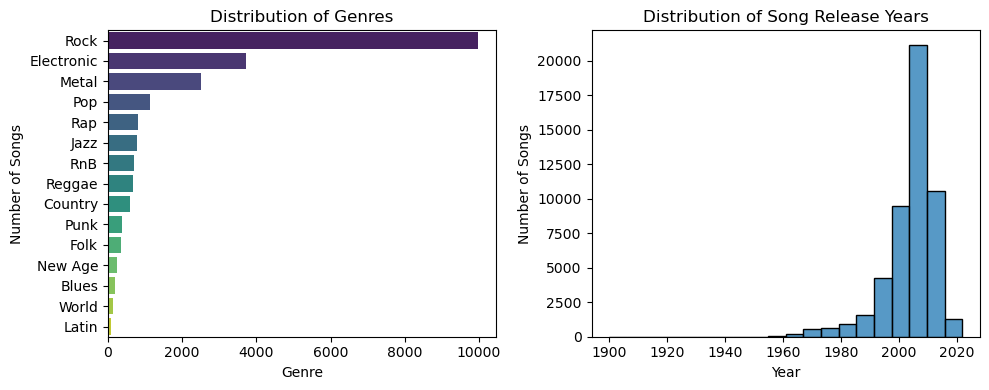

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Make hist of counts of each genre
genre_counts = music_info_df['genre'].value_counts()
genre_df = genre_counts.reset_index()
genre_df.columns = ['Genre', 'Count']

# Create  bar plot
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Genres')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Number of Songs')
#plt.tight_layout()
#plt.savefig('../images/genre_dist.png')

# Plot of distribution of song years
sns.histplot(music_info_df['year'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Song Release Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Songs')
plt.tight_layout()
plt.savefig('../images/genres_years.png')
plt.show()

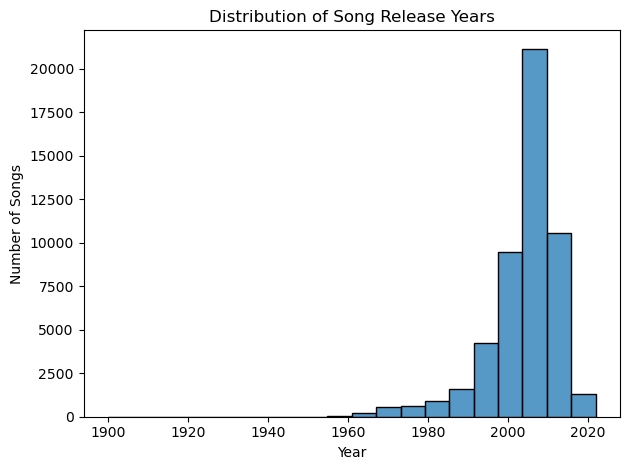

In [34]:
# Plot of distribution of song years
sns.histplot(music_info_df['year'], bins=20, kde=False)
plt.title('Distribution of Song Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.savefig('../images/year_distribution.png')

/var/folders/70/g0t97b0x2r964_f_p7d3sgwc0000gn/T/ipykernel_22938/892027463.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=tag_df.head(20), palette='viridis')


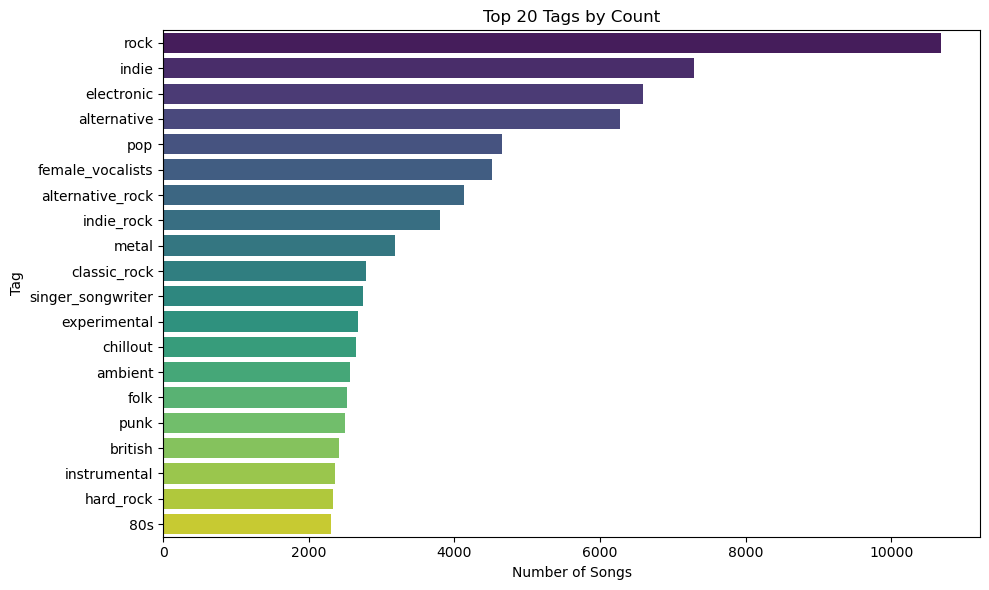

In [46]:
# Create plot for tags. First Split tags into list
music_info_df['tags'] = music_info_df['tags'].str.split(',')
all_tags = [tag.strip() for sublist in music_info_df['tags'].dropna() for tag in sublist]
tag_counts = Counter(all_tags)

# make them into a df
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Tag', data=tag_df.head(20), palette='viridis')
plt.title('Top 20 Tags by Count')
plt.xlabel('Number of Songs')
plt.ylabel('Tag')

plt.savefig('../images/tag_counts.png')

plt.tight_layout()

plt.show()

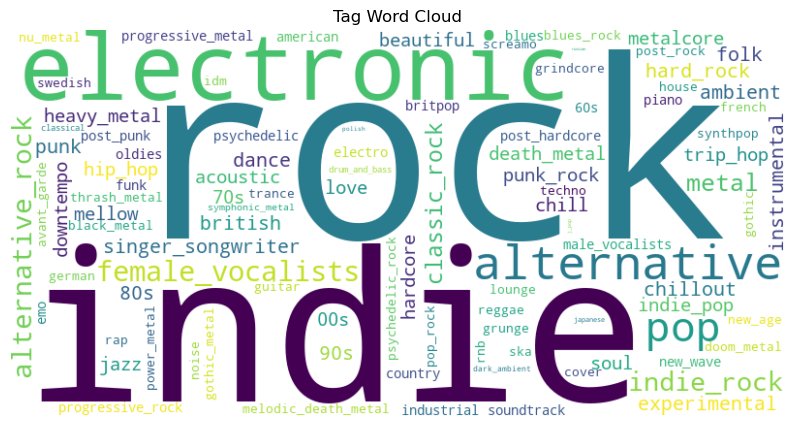

In [22]:
# Generate a word cloud from the tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tag Word Cloud')

plt.savefig('../images/tag_wordcloud.png')

plt.tight_layout()

plt.show()

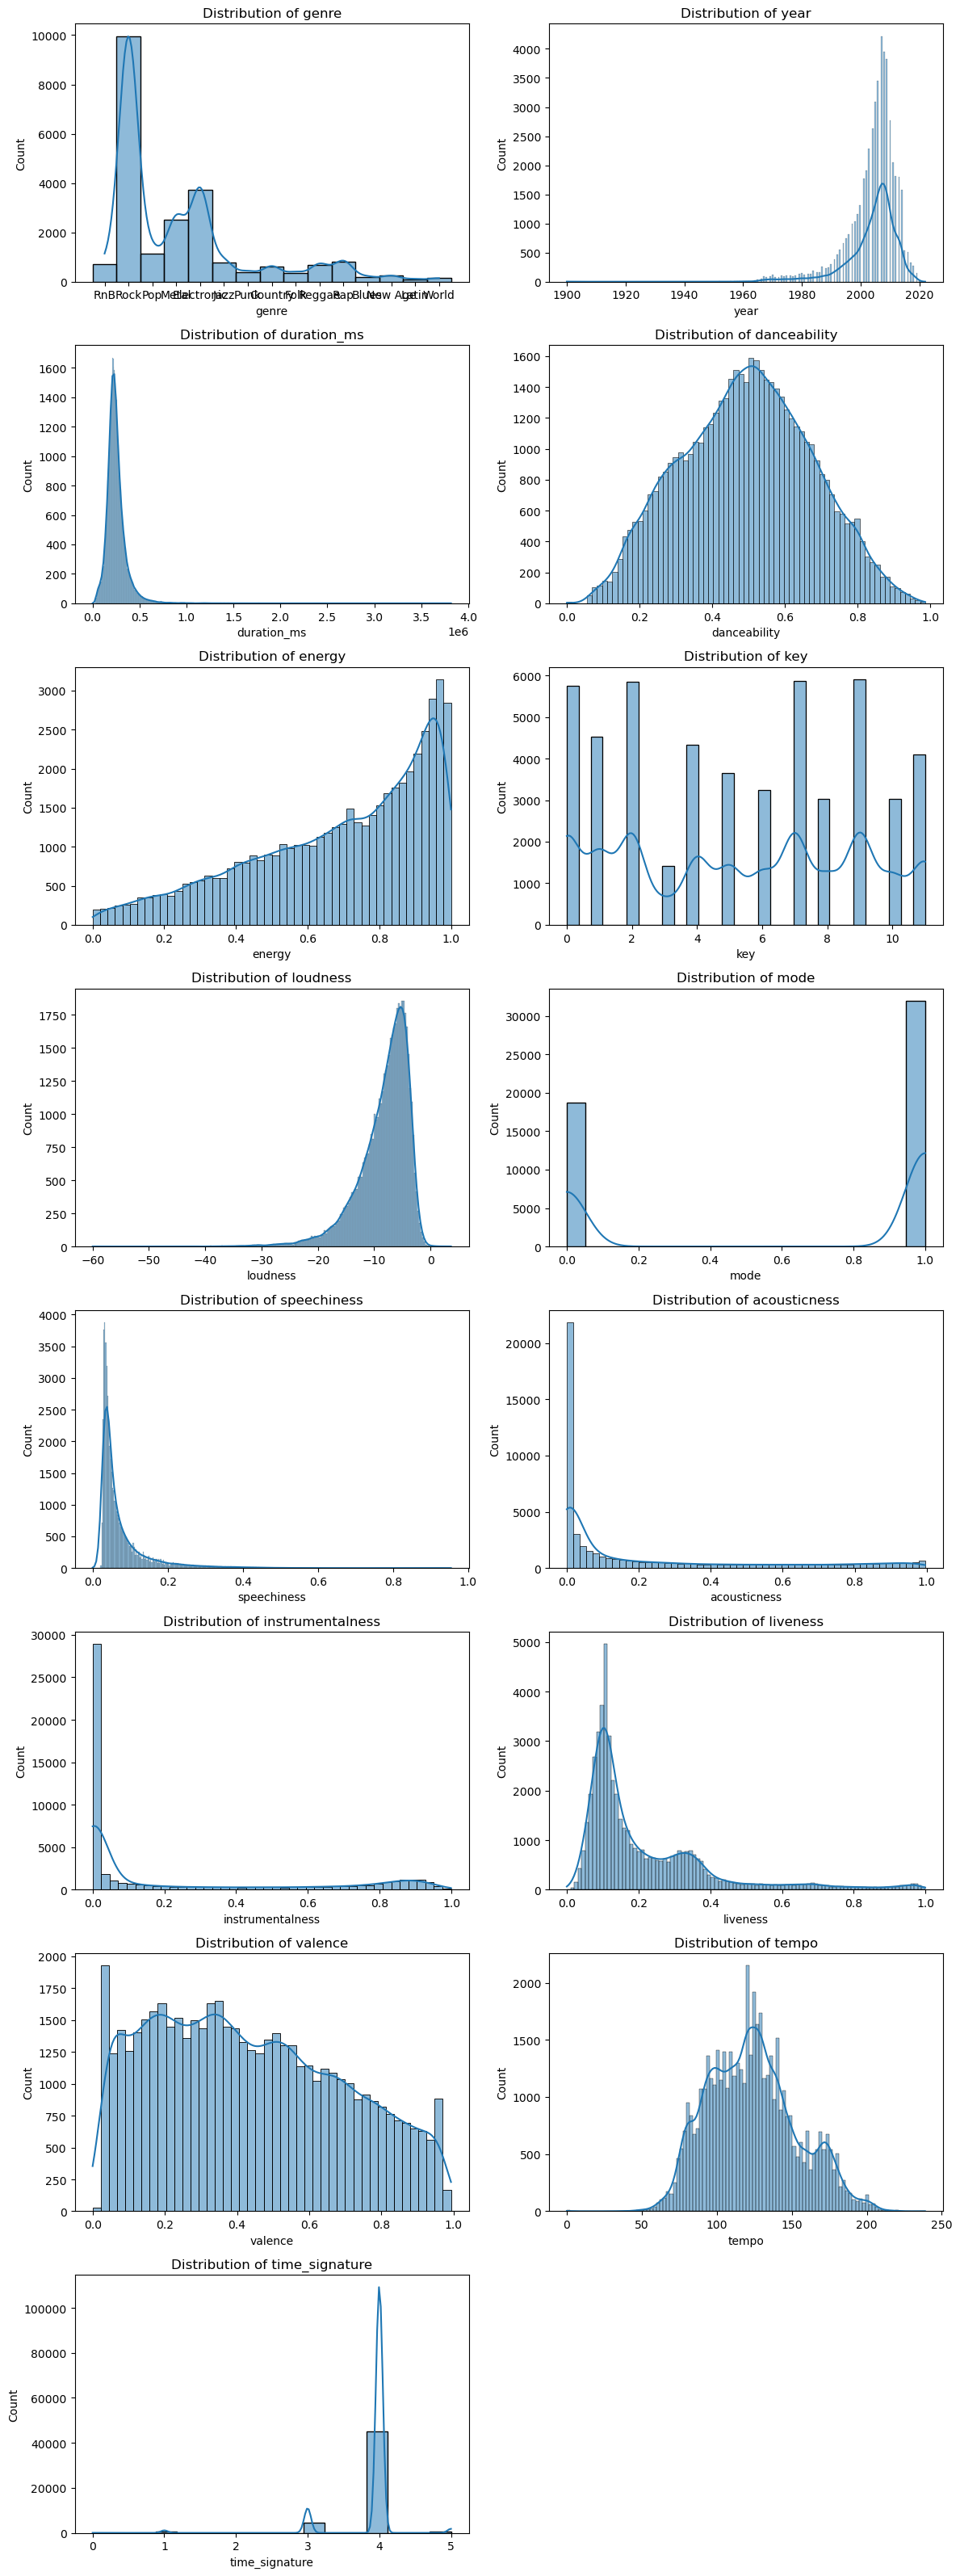

In [48]:
# Make grid of meta data plots
columns_to_plot = ['duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

for i, col in enumerate(columns_to_plot):
    row, col_idx = divmod(i, n_cols)
    sns.histplot(data=music_info_df, x=col, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

# hide stuff that isn't filled
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.savefig('../images/metadata.png')
plt.show()


In [26]:
def percent_improvement(old_value, new_value):
    percent_improvement = abs(new_value - old_value)/old_value*100
    return percent_improvement

In [27]:
percent_improvement(0.3281,0.2610)

20.45108198719902